# Example 2: Dynamic Programming

In this notebook, we use the `cubic_spline` package to solve the canonical lumpy investment problem with value function iteration.

This example requires the `sequence_jacobian` package. See [link to ssj github].


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import firm_engine as engine

Build stage block that represents the dynamic problem of firms.

In [2]:
firm = engine.build_block() 
print(firm)

<StageBlock 'firm' with stages ['tfp-shock', 'production']>


Let's print the inputs of the block. These are the objects we need to evaluate the block. Most important ones:
- `df`: discount factor, $\beta$ in the notes
- `phi`: coefficient on quadratic adjustment cost
- `xibar`: fixed cost is uniformly distributed on [0, xibar]
- `drs`: returns to scale of production function
- `alpha`: capital share

In [3]:
print(f"Inputs of firm block: {firm.inputs}")

Inputs of firm block: ['delta', 'phi', 'xibar', 'min_k', 'max_k', 'tol_bellman', 'rho_z', 'sd_z', 'n_z', 'n_k', 'w', 'alpha', 'drs', 'tfp', 're']


In [4]:
cali = {'re': 0.04, 'delta': 0.1, 'phi': 1.0, 'xibar': 0.01,
        'rho_z': 0.9, 'sd_z': 0.25, 'n_z': 3, 'min_k': 0.01, 'max_k': 10, 'n_k': 100,
        'w': 1.0, 'alpha': 0.3, 'drs': 0.85, 'tfp': 1.0, 'tol_bellman': 1E-8}

Solve for steady state policies and distribution.

In [5]:
ss = firm.steady_state(cali)

Make sure that capital grid is not binding.

In [7]:
k_low = np.min(ss.internals['firm']['production']['k'])
k_hig = np.max(ss.internals['firm']['production']['k'])
print(f"Lower bound of capital: {k_low:0.4f}")
print(f"Upper bound of capital: {k_hig:0.4f}")

Lower bound of capital: 0.0218
Upper bound of capital: 8.1049


In [8]:
%timeit firm.steady_state(cali)

789 ms ± 6.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Plot policy function in capital, conditional on average productivity.

In [11]:
def fig1(ss, kmax=5):
    k_grid = ss.internals['firm']['k_grid']
    ik = 0
    while k_grid[ik] < kmax:
        ik += 1

    i = ss.internals['firm']['production']['i']
    i_ad = ss.internals['firm']['production']['i_ad']
    p_ad = ss.internals['firm']['production']['p_ad']
    plt.plot(k_grid[:ik], 5 * i[1, :ik], label='investment')
    plt.plot(k_grid[:ik], 5 * i_ad[1, :ik], label='investment if adjust')
    plt.plot(k_grid[:ik], p_ad[1, :ik], label='adjustment probability')
    plt.axhline(0, color='gray', linestyle=':')
    plt.title('Policy functions')
    plt.xlabel('capital')
    plt.legend(frameon=False)
    plt.show()

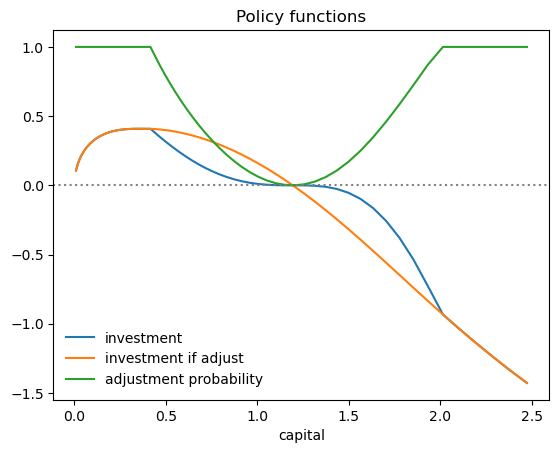

In [12]:
fig1(ss, kmax=2.5)